# Вывод
Мы установили, что метод линейной регресии, не дает хорошее прибилжение. 
Было натренеровано 3 модели:
- Линейнная L:`'AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'`
- Полиномиальная P1: `'S1', 'S2', "S2", 'S3', 'S4', 'S5', 'S6'`
- Полиномиальная P2: `'AGE', 'BMI', 'BP', 'S1', 'S2', 'S2', 'S3', 'S4', 'S5', 'S6'`

При тренировке кросс-валидацией лучший результат показала линейная модель: Accuracy: **0.46 (+/- 0.29)**
Полиномиальные показали: 
- P1: Accuracy: 0.28 (+/- 0.38) 
- P2: Accuracy: 0.34 (+/- 0.38)

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
# CrossValidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
sns.set_style("whitegrid")
sns.set_context("poster")
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape
dia = pd.DataFrame(diabetes.data)
# Note: !Data standartized! 
dia.columns = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
dia['Y'] = diabetes.target
X = dia.drop('Y', axis = 1)

In [4]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, dia.Y, test_size=0.2, random_state = 4)

lm = LinearRegression()


lm.fit(X_train, Y_train)
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,AGE,33.408770
1,SEX,-292.246729
2,BMI,481.071534
3,BP,369.062696
4,S1,-966.378494
5,S2,589.813831
6,S3,232.619244
7,S4,288.326317
8,S5,802.727046
9,S6,37.812852


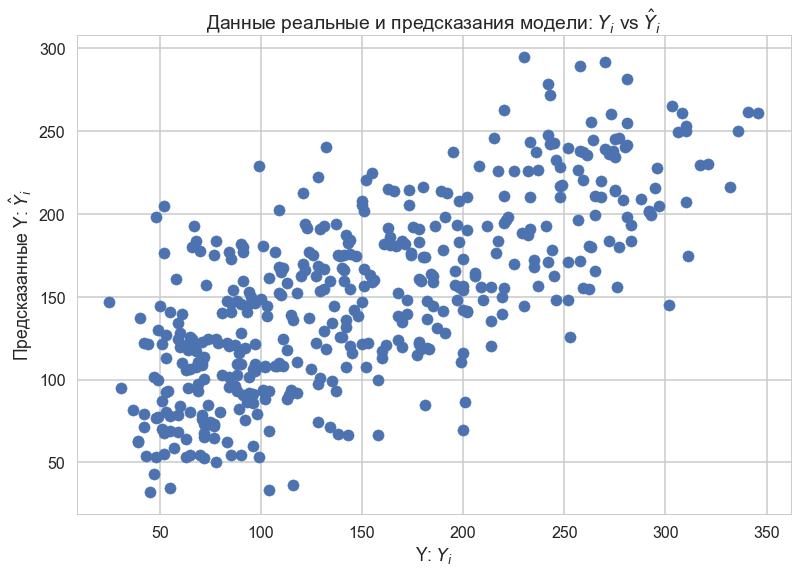

In [5]:
plt.scatter(dia.Y, lm.predict(X))
plt.xlabel(u"Y: $Y_i$")
plt.ylabel(u"Предсказанные Y: $\hat{Y}_i$")
plt.title(u"Данные реальные и предсказания модели: $Y_i$ vs $\hat{Y}_i$")

In [6]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 2862.90692018
Fit a model X_train, and calculate MSE with X_test, Y_test: 2939.41604665


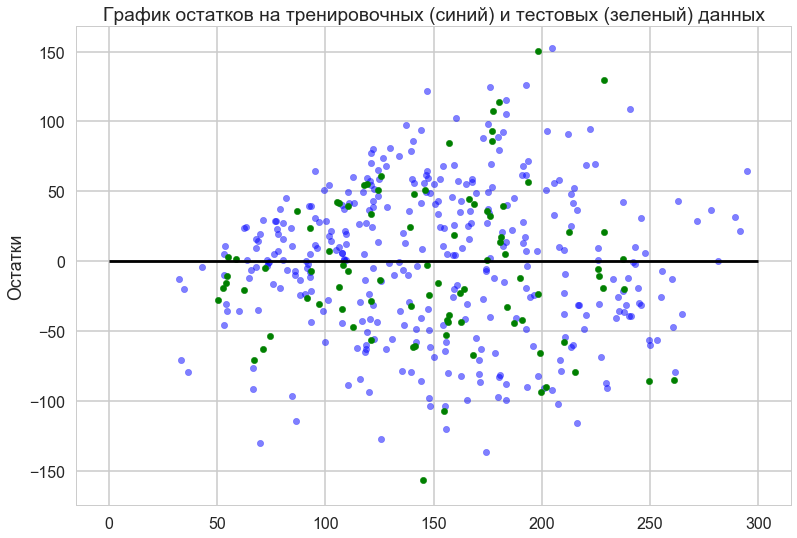

In [7]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 300)
plt.title(u'График остатков на тренировочных (синий) и тестовых (зеленый) данных')
plt.ylabel(u'Остатки')

In [8]:
scores = cross_val_score(lm, X, dia.Y, cv=10)
print "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.46 (+/- 0.29)


In [9]:
subcolumns = ['AGE', 'BMI', "BP"]
polyn = dia[subcolumns]
poly = sklearn.preprocessing.PolynomialFeatures(2, include_bias=False)
df = pd.DataFrame(poly.fit_transform(polyn))
df.columns = poly.get_feature_names(subcolumns)

dfs = pd.DataFrame(sklearn.preprocessing.scale(df))
dfs.columns = df.columns


In [10]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    dfs, diabetes.target, test_size=0.2, random_state = 4)
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,AGE,6.138541
1,SEX,36.830778
2,BMI,18.558508
3,BP,3.044350
4,S1,2.830443
5,S2,7.480487
6,S3,-1.179836
7,S4,6.543586
8,S5,0.432239


In [12]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 3482.59647653
Fit a model X_train, and calculate MSE with X_test, Y_test: 3408.8000541


In [13]:
subcolumns = ['S1', 'S2', "S2", 'S3', 'S4', 'S5', 'S6']
polyn = dia[subcolumns]
poly = sklearn.preprocessing.PolynomialFeatures(2, include_bias=False)
df = pd.DataFrame(poly.fit_transform(polyn))
df.columns = poly.get_feature_names(subcolumns)
dfs = pd.DataFrame(sklearn.preprocessing.scale(df))
dfs.columns = df.columns

In [14]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    dfs, diabetes.target, test_size=0.2, random_state = 4)
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 3447.97513468
Fit a model X_train, and calculate MSE with X_test, Y_test: 3733.76046134


In [16]:
scores = cross_val_score(lm, dfs, diabetes.target, cv=10)
print "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.28 (+/- 0.38)


In [17]:
subcolumns = ['AGE', 'BMI', "BP", 'S1', 'S2', "S2", 'S3', 'S4', 'S5', 'S6']

In [24]:
polyn = dia[subcolumns]
poly = sklearn.preprocessing.PolynomialFeatures(2, include_bias=False)
df = pd.DataFrame(poly.fit_transform(polyn))
df.columns = poly.get_feature_names(subcolumns)
print poly.get_feature_names(subcolumns)
dfs = pd.DataFrame(sklearn.preprocessing.scale(df))
dfs.columns = df.columns

['AGE', 'BMI', 'BP', 'S1', 'S2', 'S2', 'S3', 'S4', 'S5', 'S6', 'AGE^2', 'AGE BMI', 'AGE BP', 'AGE S1', 'AGE S2', 'AGE S2', 'AGE S3', 'AGE S4', 'AGE S5', 'AGE S6', 'BMI^2', 'BMI BP', 'BMI S1', 'BMI S2', 'BMI S2', 'BMI S3', 'BMI S4', 'BMI S5', 'BMI S6', 'BP^2', 'BP S1', 'BP S2', 'BP S2', 'BP S3', 'BP S4', 'BP S5', 'BP S6', 'S1^2', 'S1 S2', 'S1 S2', 'S1 S3', 'S1 S4', 'S1 S5', 'S1 S6', 'S2^2', 'S2 S2', 'S2 S3', 'S2 S4', 'S2 S5', 'S2 S6', 'S2^2', 'S2 S3', 'S2 S4', 'S2 S5', 'S2 S6', 'S3^2', 'S3 S4', 'S3 S5', 'S3 S6', 'S4^2', 'S4 S5', 'S4 S6', 'S5^2', 'S5 S6', 'S6^2']


In [19]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    dfs, diabetes.target, test_size=0.2, random_state = 4)
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 2594.7056717
Fit a model X_train, and calculate MSE with X_test, Y_test: 3470.06366106


In [21]:
scores = cross_val_score(lm, dfs, diabetes.target, cv=10)
print "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.34 (+/- 0.38)


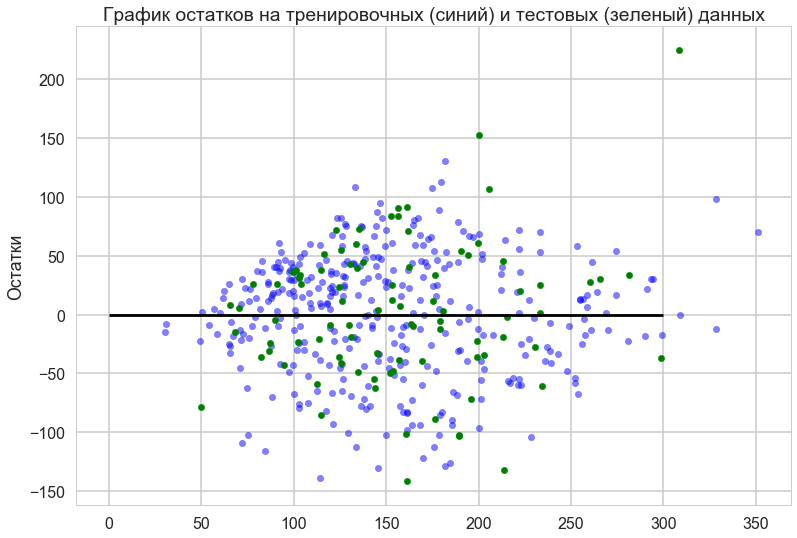

In [22]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 300)
plt.title(u'График остатков на тренировочных (синий) и тестовых (зеленый) данных')
plt.ylabel(u'Остатки')

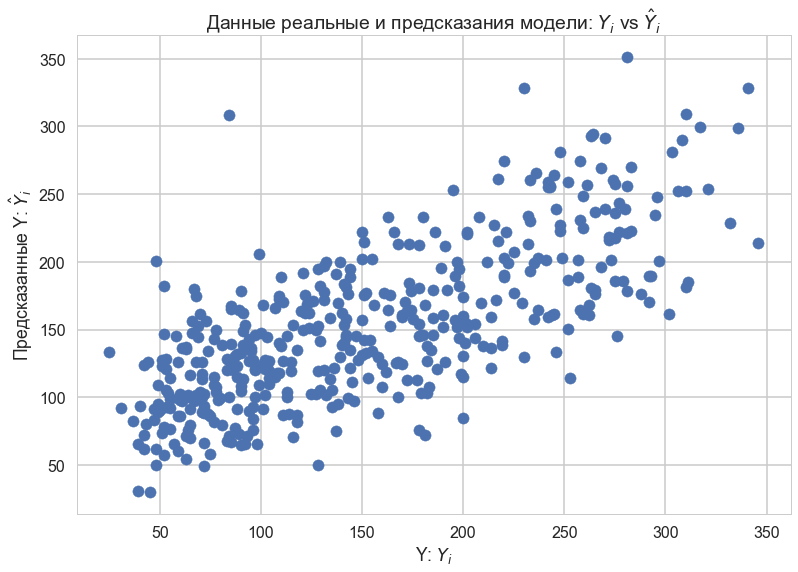

In [23]:
plt.scatter(diabetes.target, lm.predict(dfs))
plt.xlabel(u"Y: $Y_i$")
plt.ylabel(u"Предсказанные Y: $\hat{Y}_i$")
plt.title(u"Данные реальные и предсказания модели: $Y_i$ vs $\hat{Y}_i$")